![alternatvie text](https://www.doc.zuv.fau.de//M/FAU-Logo/01_FAU_Kernmarke/Web/FAU_Kernmarke_Q_RGB_blue.svg)

# Perception in Robotics

Summer Semester 2024, Friedrich-Alexander-Universität Erlangen-Nürnberg

# 2. Exercise - Image Filtering

In this exercise, we will cover image filtering using the [OpenCV](https://docs.opencv.org/4.x/d0/de3/tutorial_py_intro.html) and [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) python libraries. As example images we will use samples from the [Kodak](https://r0k.us/graphics/kodak/) dataset.

The goal of this exercise is the become familiar with different types of noise and filtering.

The solutions for the assignment may be a Python Notebook or .py files. The visual results can be integrated into the notebook or a PDF document.

In [1]:
# Import libaries which we will use in this exercise.
import cv2
import numpy as np
import matplotlib.pyplot as plt

## A. Image Noise

To study the impact of different types of noise, load the image (`kodim21.png`) and convert it to grayscale by using **OpenCV**. 

In [2]:
img = cv2.imread('kodim21.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Salt and Pepper Noise
Random occurrence of black and white pixels in an image is called [salt and pepper noise](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

Implement a function that adds salt and pepper noise to a given grayscale image by using numpy and plot the resulting image.

Note: Use a number of white and black pixels each between 300 and 10000.

In [3]:
def add_salt_pepper_noise(img):
    noisy_img = img.copy()
    num_salt = np.random.randint(300, 10000)
    num_pepper = np.random.randint(300, 10000)

    # Salt (white)
    coords = [np.random.randint(0, i, num_salt) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 255

    # Pepper (black)
    coords = [np.random.randint(0, i, num_pepper) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 0

    return noisy_img

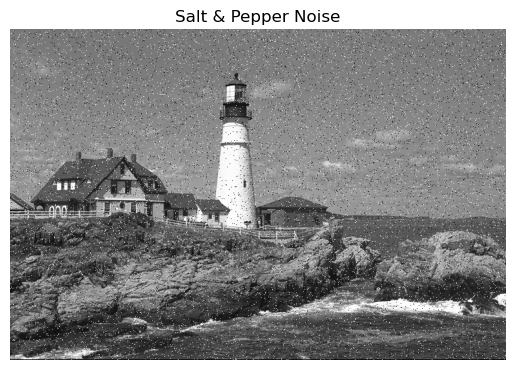

In [4]:
sp_img = add_salt_pepper_noise(gray)
plt.imshow(sp_img, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')
plt.show()

### Gaussian Noise
Intensity variation based on a probability density function equal to
the normal distribution. Commonly used to model sensor noise.

Implement a function that adds gaussian noise to a given grayscale image by using numpy and plot the resulting image.

Note: Convert image and noise to the same data type and account for values larger than the range of pixel values e.g., 255 after adding noise. Use zero mean and a standard deviation of 0.05 for the gaussian noise.

In [5]:
def add_gaussian_noise(img):
    img = img / 255.0  # Normalize to [0,1]
    noise = np.random.normal(0, 0.05, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 1)
    return (noisy_img * 255).astype(np.uint8)

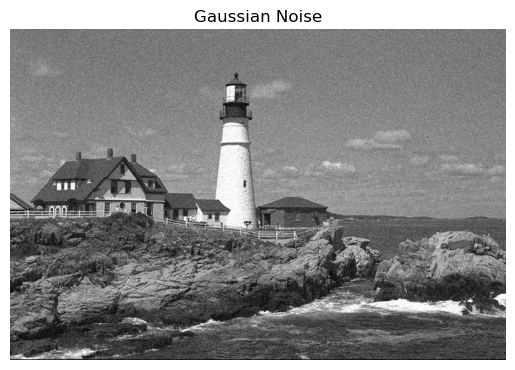

In [6]:
gaussian_img = add_gaussian_noise(gray)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')
plt.show()

## B. Convolution
Implement the convolution algorithm in numpy, with stride 1. Your implementation shall be able to handle kernels with size 3x3 and 5x5, and should not make use of any library calls to perform the actual convolution.

Note: To obtain an output with the same size as the input zero padding is required.

In [7]:
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    padded_img = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image)

    for i in range(image_h):
        for j in range(image_w):
            region = padded_img[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)
    
    return output.astype(np.uint8)

Apply your implemented convolution with the following filters, plot the output and explain which effect each kernel has on the input image.

In [8]:
kernel1 = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    
kernel2 = np.array([[-1, -1, -1],
                  [0, 0, 0],
                  [1, 1, 1]])

kernel3 =  1/256 * np.array([[1, 4, 6, 4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1, 4, 6, 4, 1]])

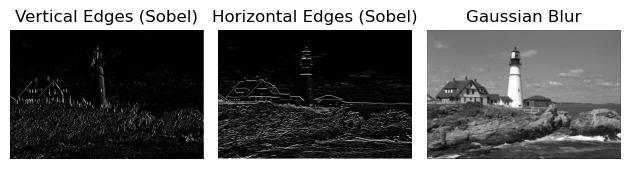

In [9]:
out1 = convolve2d(gray, kernel1)
out2 = convolve2d(gray, kernel2)
out3 = convolve2d(gray, kernel3)

titles = ['Vertical Edges (Sobel)', 'Horizontal Edges (Sobel)', 'Gaussian Blur']
images = [out1, out2, out3]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## C. Filtering
Here, we introduce the [image filtering function](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html) of **OpenCV** and investigate their denoising performance on an image corrupted by salt and pepper noise.

First, use the function `add_salt_pepper_noise` from task A and apply salt and pepper noise to `kodim21.png`.

In [10]:
noisy_img = add_salt_pepper_noise(gray)

Then, apply the **OpenCV** filters for averaging, gaussian blur, median and bilateral filtering.

In [11]:
avg = cv2.blur(noisy_img, (3,3))
gauss = cv2.GaussianBlur(noisy_img, (3,3), 0)
median = cv2.medianBlur(noisy_img, 3)
bilateral = cv2.bilateralFilter(noisy_img, 9, 75, 75)

Plot the filter outputs and the initial noisy image side by side. Explain the performance of each filter and give an argument for why the best performing filter works so well in this scenario.

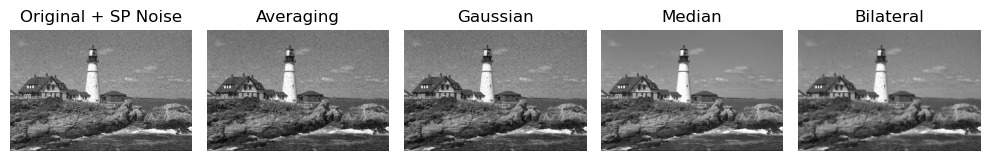

In [12]:
titles = ['Original + SP Noise', 'Averaging', 'Gaussian', 'Median', 'Bilateral']
images = [noisy_img, avg, gauss, median, bilateral]

plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()